# Word2Vec

Let's work on skipgram-based implementation of word2vec.

In [76]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import reuters
import time

In [77]:
# NLTK data is downloade

nltk.download("reuters")
nltk.download("punkt_tab")
nltk.data.path.append('C:/Users/Arunya Senadeera/AppData/Roaming/nltk_data/tokenizers')  

[nltk_data] Downloading package reuters to C:\Users\Arunya
[nltk_data]     Senadeera\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Arunya
[nltk_data]     Senadeera\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## 1. Define corpus data 

In [78]:


# Prepare real-world corpus
# Corpus Creation
def prepare_corpus():
    corpus = [nltk.word_tokenize(reuters.raw(fileid)) for fileid in reuters.fileids()[:500]]
    return corpus

corpus = prepare_corpus()
print("Prepared Corpus Sample:", corpus[:5])

Prepared Corpus Sample: [['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U.S.-JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U.S.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'s", 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far-reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.', 'They', 'told', 'Reuter', 'correspondents', 'in', 'Asian', 'capitals', 'a', 'U.S.', 'Move', 'against', 'Japan', 'might', 'boost', 'protectionist', 'sentiment', 'in', 'the', 'U.S.', 'And', 'lead', 'to', 'curbs', 'on', 'American', 'imports', 'of', 'their', 'products', '.', 'But', 'some', 'exporters', 'said', 'that', 'while', 'the', 'conflict', 'would', 'hurt', 'them', 'in', 'the', 'long-run', ',', 'in', 'the', 'short-term', 'Tokyo', "'s", 'loss', 'might', 'be', 'their', 'gain', '.', 'The', 'U.S.', 'Has', 'said', 'it', 'will', 'impose', '300', 'mln', 'dlrs', 'of', 'tariffs', 'on', 'imports', 'of', 'Japane

In [79]:
# Flatten function
flatten = lambda l: [item for sublist in l for item in sublist]


In [80]:
# Prepare vocabulary
#numericalization
corpus = prepare_corpus()
vocab = list(set(flatten(corpus)))

vocab.insert(0, "<UNK>")
word2index = {w: i for i, w in enumerate(vocab)}
index2word = {i: w for w, i in word2index.items()}
voc_size = len(vocab)


In [81]:

word2index = {w: i for i, w in enumerate(vocab)}
print(word2index)

{'<UNK>': 0, 'takes': 1, 'broadly': 2, 'Morris': 3, 'be': 4, 'Anhui': 5, '12664': 6, 'STABILITY': 7, 'alternate': 8, 'car': 9, 'weakness': 10, 'Results': 11, 'ACQUISITION': 12, 'counterparts': 13, 'US': 14, 'surpluses': 15, '20': 16, '19.4p': 17, 'are': 18, 'Croesus': 19, 'january': 20, '200.6': 21, 'obvious': 22, 'signficant': 23, '1.26': 24, 'thrust': 25, 'Santa': 26, 'FFOM': 27, 'owners': 28, '14.54': 29, 'thirds': 30, 'FOODGRAIN': 31, 'spokeswoman': 32, 'stability': 33, 'dispute': 34, 'THIS': 35, '23.8': 36, 'policies': 37, 'Martin': 38, '74.2': 39, 'WEDNESDAY': 40, 'inadequate': 41, 'daily': 42, 'streamlining': 43, 'feet': 44, 'extend': 45, 'premiums': 46, 'decreases': 47, '2.26': 48, '3.75': 49, 'Coffee': 50, 'guidelines': 51, 'second': 52, 'HIGH': 53, 'GHANA': 54, 'theme': 55, 'JAN': 56, 'Outlook': 57, 'Taiwan': 58, '481p': 59, 'deficit': 60, 'assure': 61, 'supplemental': 62, 'Heinken': 63, 'kl': 64, 'Rains': 65, 'proposed': 66, 'attributed': 67, 'sapped': 68, 'imbalance': 69, '

In [82]:
#vocab size
print(voc_size)

10052


In [83]:
vocab

['<UNK>',
 'takes',
 'broadly',
 'Morris',
 'be',
 'Anhui',
 '12664',
 'STABILITY',
 'alternate',
 'car',
 'weakness',
 'Results',
 'ACQUISITION',
 'counterparts',
 'US',
 'surpluses',
 '20',
 '19.4p',
 'are',
 'Croesus',
 'january',
 '200.6',
 'obvious',
 'signficant',
 '1.26',
 'thrust',
 'Santa',
 'FFOM',
 'owners',
 '14.54',
 'thirds',
 'FOODGRAIN',
 'spokeswoman',
 'stability',
 'dispute',
 'THIS',
 '23.8',
 'policies',
 'Martin',
 '74.2',
 'WEDNESDAY',
 'inadequate',
 'daily',
 'streamlining',
 'feet',
 'extend',
 'premiums',
 'decreases',
 '2.26',
 '3.75',
 'Coffee',
 'guidelines',
 'second',
 'HIGH',
 'GHANA',
 'theme',
 'JAN',
 'Outlook',
 'Taiwan',
 '481p',
 'deficit',
 'assure',
 'supplemental',
 'Heinken',
 'kl',
 'Rains',
 'proposed',
 'attributed',
 'sapped',
 'imbalance',
 'optic',
 'stabilising',
 'ECONOMY',
 'green',
 'intermittently',
 'tissue',
 'proving',
 'BE',
 'stand',
 '165',
 'end-of-fiscal-year',
 'seem',
 '261',
 'lapse',
 'ITALY',
 'builders',
 'Employers',


## 2. Prepare train data

In [84]:
# Dynamic window size function
def random_batch(batch_size, word_sequence, window_size=2):
    skip_grams = []
    for sent in word_sequence:
        for i in range(len(sent)):
            target = word2index.get(sent[i], word2index["<UNK>"])
            context_indices = list(range(max(0, i - window_size), min(len(sent), i + window_size + 1)))
            context_indices.remove(i)
            context = [word2index.get(sent[j], word2index["<UNK>"]) for j in context_indices]
            for w in context:
                skip_grams.append([target, w])

    random_inputs = []
    random_labels = []
    random_index = np.random.choice(len(skip_grams), batch_size, replace=False)
    for i in random_index:
        random_inputs.append([skip_grams[i][0]])
        random_labels.append([skip_grams[i][1]])

    return np.array(random_inputs), np.array(random_labels)


### Testing the method

In [85]:
#testing the method
batch_size = 2 # mini-batch size
input_batch, target_batch = random_batch(batch_size, corpus)

print("Input: ", input_batch)
print("Target: ", target_batch)

#we will convert them to tensor during training, so don't worry...

Input:  [[9761]
 [7496]]
Target:  [[7628]
 [3582]]


## 3. Model

$$J(\theta) = -\frac{1}{T}\sum_{t=1}^{T}\sum_{\substack{-m \leq j \leq m \\ j \neq 0}}\log P(w_{t+j} | w_t; \theta)$$

where $P(w_{t+j} | w_t; \theta) = $

$$P(o|c)=\frac{\exp(\mathbf{u_o^{\top}v_c})}{\sum_{w=1}^V\exp(\mathbf{u_w^{\top}v_c})}$$

where $o$ is the outside words and $c$ is the center word

In [86]:
# Skip-gram model
class Skipgram(nn.Module):
    def __init__(self, vocab_size, emb_size):
        super(Skipgram, self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, emb_size)
        self.embedding_u = nn.Embedding(vocab_size, emb_size)

    def forward(self, center_words, target_words, all_vocabs):
        center_embeds = self.embedding_v(center_words)  # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words)  # [batch_size, 1, emb_size]
        all_embeds = self.embedding_u(all_vocabs)       # [batch_size, voc_size, emb_size]

        scores = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        norm_scores = all_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)

        nll = -torch.mean(torch.log(torch.exp(scores) / torch.sum(torch.exp(norm_scores), 1).unsqueeze(1)))
        return nll


## 4. Training

In [87]:
# Training
batch_size = 256
embedding_size = 100
window_size = 2
model = Skipgram(voc_size, embedding_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)

def prepare_sequence(seq, word2index):
    idxs = [word2index.get(w, word2index["<UNK>"]) for w in seq]
    return torch.LongTensor(idxs)

#use for the normalized term in the probability calculation
all_vocabs = prepare_sequence(vocab, word2index).expand(batch_size, len(vocab))

num_epochs = 1000

for epoch in range(num_epochs):
    start_time = time.time()

    input_batch, target_batch = random_batch(batch_size, corpus, window_size)
    input_batch = torch.LongTensor(input_batch)
    target_batch = torch.LongTensor(target_batch)

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)

    loss.backward()
    optimizer.step()

    end_time = time.time()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch: {epoch + 1} | Loss: {loss.item():.6f} | Time: {end_time - start_time:.2f}s")

Epoch: 100 | Loss: 33.728931 | Time: 1.07s
Epoch: 200 | Loss: 29.944223 | Time: 1.13s
Epoch: 300 | Loss: 28.520586 | Time: 1.03s
Epoch: 400 | Loss: 28.957211 | Time: 1.51s
Epoch: 500 | Loss: 26.294468 | Time: 1.22s
Epoch: 600 | Loss: 25.677248 | Time: 1.07s
Epoch: 700 | Loss: 25.460781 | Time: 1.04s
Epoch: 800 | Loss: 24.127565 | Time: 1.03s
Epoch: 900 | Loss: 23.915401 | Time: 1.05s
Epoch: 1000 | Loss: 22.801897 | Time: 1.10s


## 5. Plotting the embeddings

In [95]:
#list of vocabs
vocab[:10]

['<UNK>',
 'takes',
 'broadly',
 'Morris',
 'be',
 'Anhui',
 '12664',
 'STABILITY',
 'alternate',
 'car']

In [96]:
word = vocab[0]

In [97]:
#numericalization
id = word2index[word]
id

0

In [98]:
id_tensor = torch.LongTensor([id])
id_tensor

tensor([0])

In [92]:
#get the embedding by averaging
v_embed = model.embedding_v(id_tensor)
u_embed = model.embedding_u(id_tensor)

v_embed, u_embed

(tensor([[ 3.2103e-01, -4.2538e-01,  9.9724e-01, -1.2338e+00,  1.7288e-01,
          -8.5293e-01,  2.3720e-01, -1.6526e+00, -7.2242e-01, -1.8417e+00,
           1.5912e-01, -1.0795e+00, -1.3248e+00,  1.1034e+00,  1.4772e+00,
           1.4341e+00, -9.5178e-02,  7.4193e-01, -5.5162e-01, -5.0747e-01,
          -7.9754e-01, -6.4732e-01, -3.3751e-01,  1.7169e-01,  1.3483e+00,
           1.0273e-01, -5.4025e-02, -5.6906e-01, -1.3629e+00,  1.3937e+00,
           1.2163e+00, -8.4758e-01, -8.8395e-01, -5.3358e-01, -8.9658e-02,
           4.5654e-01,  2.3813e-01,  4.6504e-01, -1.0738e+00, -2.3757e-01,
          -1.2255e+00, -3.9185e-01,  2.4713e+00,  2.7622e-01,  1.4864e-01,
           9.4581e-01,  4.6191e-01,  5.8458e-01, -4.0466e-01,  5.7210e-01,
          -1.2802e-03, -5.6215e-01,  1.2549e-01,  6.0222e-01,  7.3951e-01,
          -3.2246e-01,  1.3693e+00,  1.2751e+00,  1.2436e-01, -7.9718e-01,
           3.1156e-01, -2.0307e-01, -4.5195e-01,  8.8574e-01, -1.2316e+00,
          -4.4767e-01,  7

In [93]:
#average to get the word embedding
word_embed = (v_embed + u_embed) / 2
word_embed[0][1]

tensor(-0.2904, grad_fn=<SelectBackward0>)

In [94]:
#let's write a function to get embedding given a word
def get_embed(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor) 
    word_embed = (v_embed + u_embed) / 2 
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

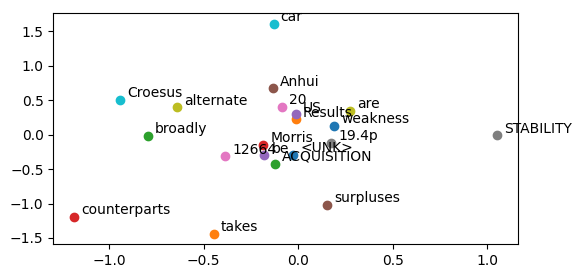

In [99]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()